# Neural network regularization

<b>Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well.
<b>

<h1>Different Regularization Techniques<h1>
    
    1. L2 & L1 regularization
    2. Dropout

<b>L2 & L1 regularization<b>

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-1.59.57-AM.png' />

<b>Dropout<b>

<img src='https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-11.52.06-PM.png' />

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T
X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T

<img src='./images/Screenshot_20230203_112620.png'/>

<img src='./images/Screenshot_20230203_112637.png'/>

<img src='./images/Screenshot_20230203_112651.png' />

<img src='./images/Screenshot_20230203_112651.png' />

In [5]:
def tanh(x):
    return np.tanh(x)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

In [7]:
def NN(X,Y,iter = 150 ,l1_reg = False , dropout = False, lr= 0.01 , lm= 0.7 , num_hidden = 1000 , keep_rate = 0.85):
    
    #initilze parametrs
    n_x = X.shape[0]
    n_y = Y.shape[0]
     
    w1 = np.random.randn(num_hidden, n_x)*0.01
    b1 = np.zeros((num_hidden, 1))
    
    w2 = np.random.randn(n_y, num_hidden)*0.01
    b2 = np.zeros((n_y, 1))
    
    m = X.shape[1]

    for i in  range(iter):
        #forward_propagation
        z1 = np.dot(w1, X) + b1
        a1 = tanh(z1)
        
        D1 = None
        
        # Dropout regularization
        if dropout == True:
            D1 = np.random.rand(a1.shape[0], a1.shape[1])
            D1 = D1 < keep_rate
            a1 = a1 * D1
            a1 = a1/keep_rate
    
        z2 = np.dot(w2, a1) + b2
        a2 = softmax(z2)
        
        #back_propagation
        dz2 = (a2 - Y)
        dw2 = (1/m)*np.dot(dz2, a1.T)
        
        # l2 regularization
        if l1_reg == True : dw2 + (lm*w2)/m
        db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
        
        dz1 = None
        
        if dropout == True:
            da1 = np.dot(w2.T,dz2)
            da1 = da1 * D1
            da1 = da1 / keep_rate
            dz1 = np.multiply(da1, np.int64(a1 > 0))
        else:   
            dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)

        dw1 = (1/m)*np.dot(dz1, X.T)
        if l1_reg == True : dw1 + (lm*w1)/m
        db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
        
        w1 = w1 - lr*dw1
        b1 = b1 - lr*db1
        w2 = w2 - lr*dw2
        b2 = b2 - lr*db2
          
    return [w1,b1,w2,b2]
    

In [8]:
def Predict(X_train, Y_train , X_test, Y_test):
    par = NN(X_train,Y_train ,l1_reg = True, dropout= False)
    
    
    z1 = np.dot(par[0], X_test) + par[1]
    a1 = tanh(z1)
    
    z2 = np.dot(par[2], a1) + par[3]
    a2 = softmax(z2)
    
    a_last = np.argmax(a2, 0)
    
    labels = np.argmax(Y_test, 0)
    
    acc = np.mean(a_last == labels)*100
    print(acc)
    print(a_last)
    return a_last


In [9]:
pr = Predict(X_train, Y_train , X_test, Y_test)    

85.42857142857143
[0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 6 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 5 1 1 1 1 1 1
 1 2 4 2 2 2 2 2 2 2 2 2 2 2 4 7 2 2 2 8 2 2 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 9 9 3 3 3 5 2 3 9 3 3 1 5 3 3 3 3 3 3 3 2 3 3 3 1 3 3 2 3 3 3 8 3
 3 3 8 4 4 4 4 4 4 4 6 4 4 4 4 0 9 4 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 2 4 4 4
 4 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 8 5 5 8 5 5 5 5 5 5 2 3 3 5 3 6 6 6 0 6 6
 6 6 6 6 0 0 0 6 6 6 6 6 6 6 6 6 6 5 6 7 7 8 7 7 7 7 7 7 7 7 7 7 2 7 7 7 7
 7 7 7 2 9 7 7 2 7 7 7 7 7 7 7 7 7 7 7 8 8 8 0 8 8 8 8 8 9 8 8 8 8 8 8 8 8
 8 8 8 8 9 8 8 8 8 8 8 3 8 9 7 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 7 9
 9 9 9 9 9 9 7 9 9 9 9 9 9 9 9 9 9]


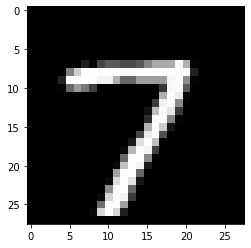

7


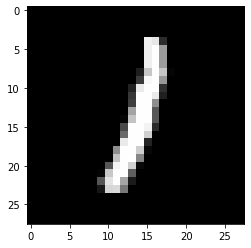

1


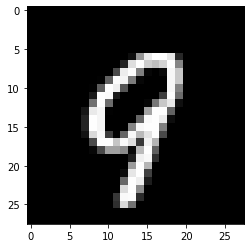

9


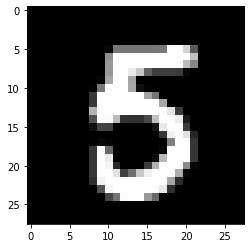

5


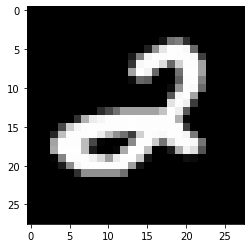

2


In [14]:
for i in range(5):
    index = random.randrange(0, X_test.shape[1])
    
    plt.imshow(X_test[:, index].reshape(28, 28), cmap = 'gray')
    plt.show()
    print(pr[index])

In [15]:
a=X_test[: ,5].reshape(28,28)
a.shape
b = X_test[: , 0].reshape(784 ,1)
b.shape
X_test.shape

(784, 350)